In [15]:
import pickle
import pandas as pd
import numpy as np
import re
import pymysql

In [16]:
host = ''
user = ''
password = ''
db = ''
con =pymysql.connect(host=host, user=user, password=password, db=db, charset='utf8')
cur = con.cursor()

In [17]:
query = 'SELECT * FROM weather_accident'
cur.execute(query)
con.commit()

In [18]:
weather_acc_all_df = pd.read_sql_query("select * from weather_accident", con=con)

/tmp/ipykernel_10872/3843719935.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  weather_acc_all_df = pd.read_sql_query("select * from weather_accident", con=con)


In [19]:
weather_acc_all_df.isnull().sum()

JIJACE_NM        0
CHISA            0
ACC_HUM          0
SIDO_CD          0
GUBUN_NM         0
SLTWD_CNT        0
SERI_ACC         0
SIDO_NM          0
AC_MODE          0
CRT_JIJACE_CD    0
BASE_NAME        0
BIG_CNT          0
PSGT_CNT         0
WND_ACC          0
ACC_CNT          0
TRK_CNT          0
DEATH_CNT        0
BASE_CODE        0
WND_CNT          0
DEATH_ACC        0
GUBUN            0
SERI_CNT         0
SLTWD_ACC        0
YEAR             0
BASE_CATEGORY    0
dtype: int64

In [20]:
weather_acc_all_df['BASE_NAME']

0       맑음
1       맑음
2       맑음
3       맑음
4       맑음
        ..
3614    기타
3615    기타
3616    기타
3617    기타
3618    기타
Name: BASE_NAME, Length: 3619, dtype: object

In [21]:
weather_acc_all_df.head(1)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,GUBUN_NM,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.37,3625,11000,승용,2704,578,서울,A,11680,...,0,9,01,249,9,01,663,1748,2018,weather


In [22]:
kr_to_en = {
  '강남구': 'Gangnam-gu',
  '강동구': 'Gangdong-gu',
  '강북구': 'Gangbuk-gu',
  '강서구': 'Gangseo-gu',
  '관악구': 'Gwanak-gu',
  '광진구': 'Gwangjin-gu',
  '구로구': 'Guro-gu',
  '금천구': 'Geumcheon-gu',
  '노원구': 'Nowon-gu',
  '도봉구': 'Dobong-gu',
  '동대문구': 'Dongdaemun-gu',
  '동작구': 'Dongjak-gu',
  '마포구': 'Mapo-gu',
  '서대문구': 'Seodaemun-gu',
  '서초구': 'Seocho-gu',
  '성동구': 'Seongdong-gu',
  '성북구': 'Seongbuk-gu',
  '송파구': 'Songpa-gu',
  '양천구': 'Yangcheon-gu',
  '영등포구': 'Yeongdeungpo-gu',
  '용산구': 'Yongsan-gu',
  '은평구': 'Eunpyeong-gu',
  '종로구': 'Jongno-gu',
  '중구': 'Jung-gu',
  '중랑구': 'Jungnang-gu',
}

In [23]:
weather_acc_all_df['JIJACE_NM'] = weather_acc_all_df['JIJACE_NM'].map(kr_to_en)

In [24]:
kr_to_en_weather = {
  '맑음': 'Clear',
  '흐림': 'Cloudy',
  '비': 'Rain',
  '눈': 'Snow',
  '기타': 'Other',
  '안개': 'Fog',
}

In [25]:
weather_acc_all_df['BASE_NAME'] = weather_acc_all_df['BASE_NAME'].map(kr_to_en_weather)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

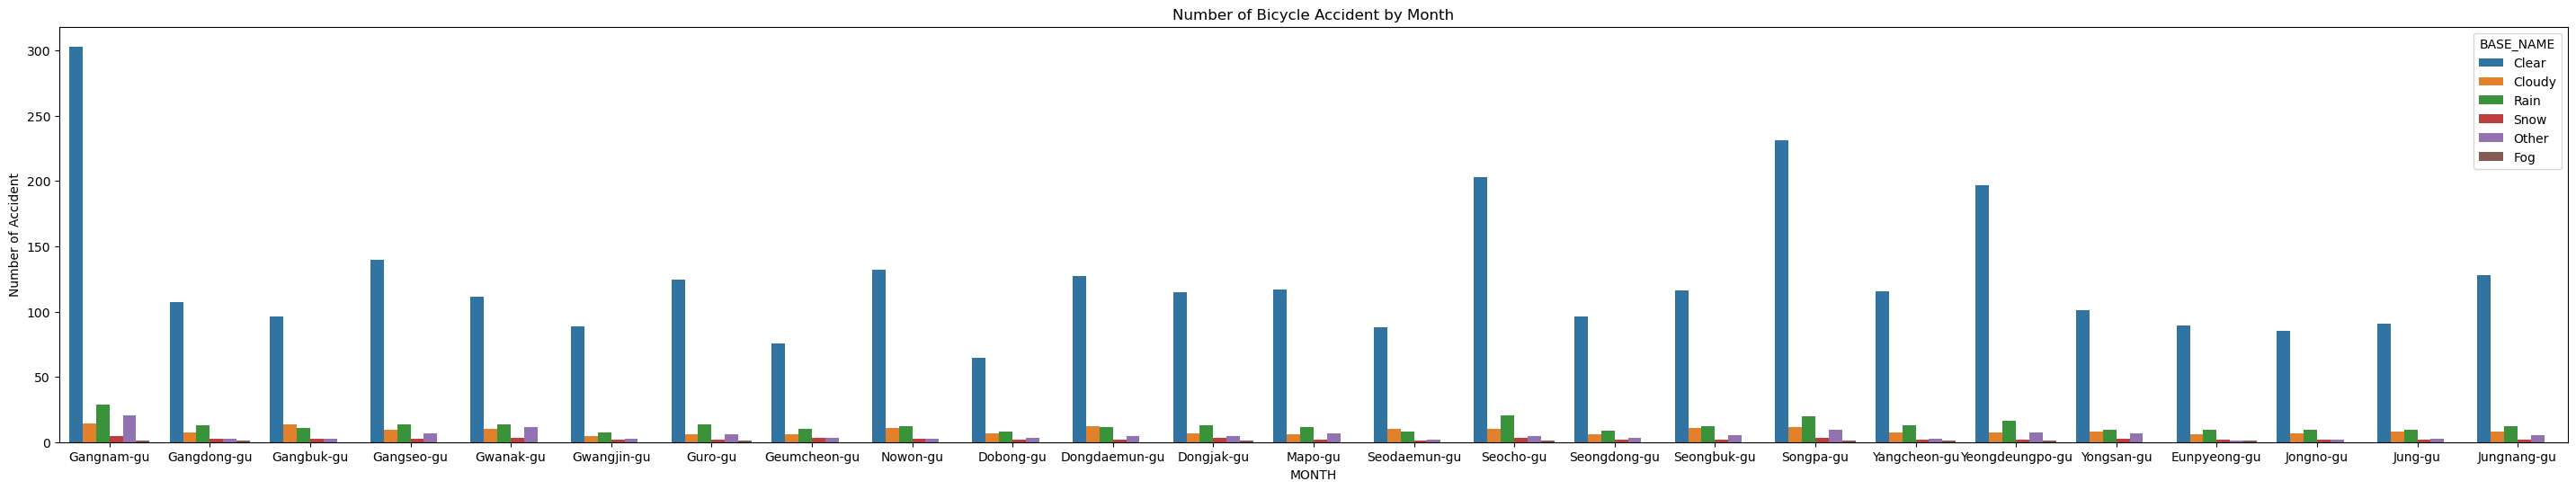

In [32]:
plt.figure(figsize=(36,6))
sns.barplot(x=weather_acc_all_df['JIJACE_NM'], y=weather_acc_all_df['ACC_CNT'], hue=weather_acc_all_df['BASE_NAME'], data=weather_acc_all_df, errorbar=None)
plt.title('Number of Bicycle Accident by Month')
plt.xlabel('MONTH')
plt.ylabel('Number of Accident')
plt.show()

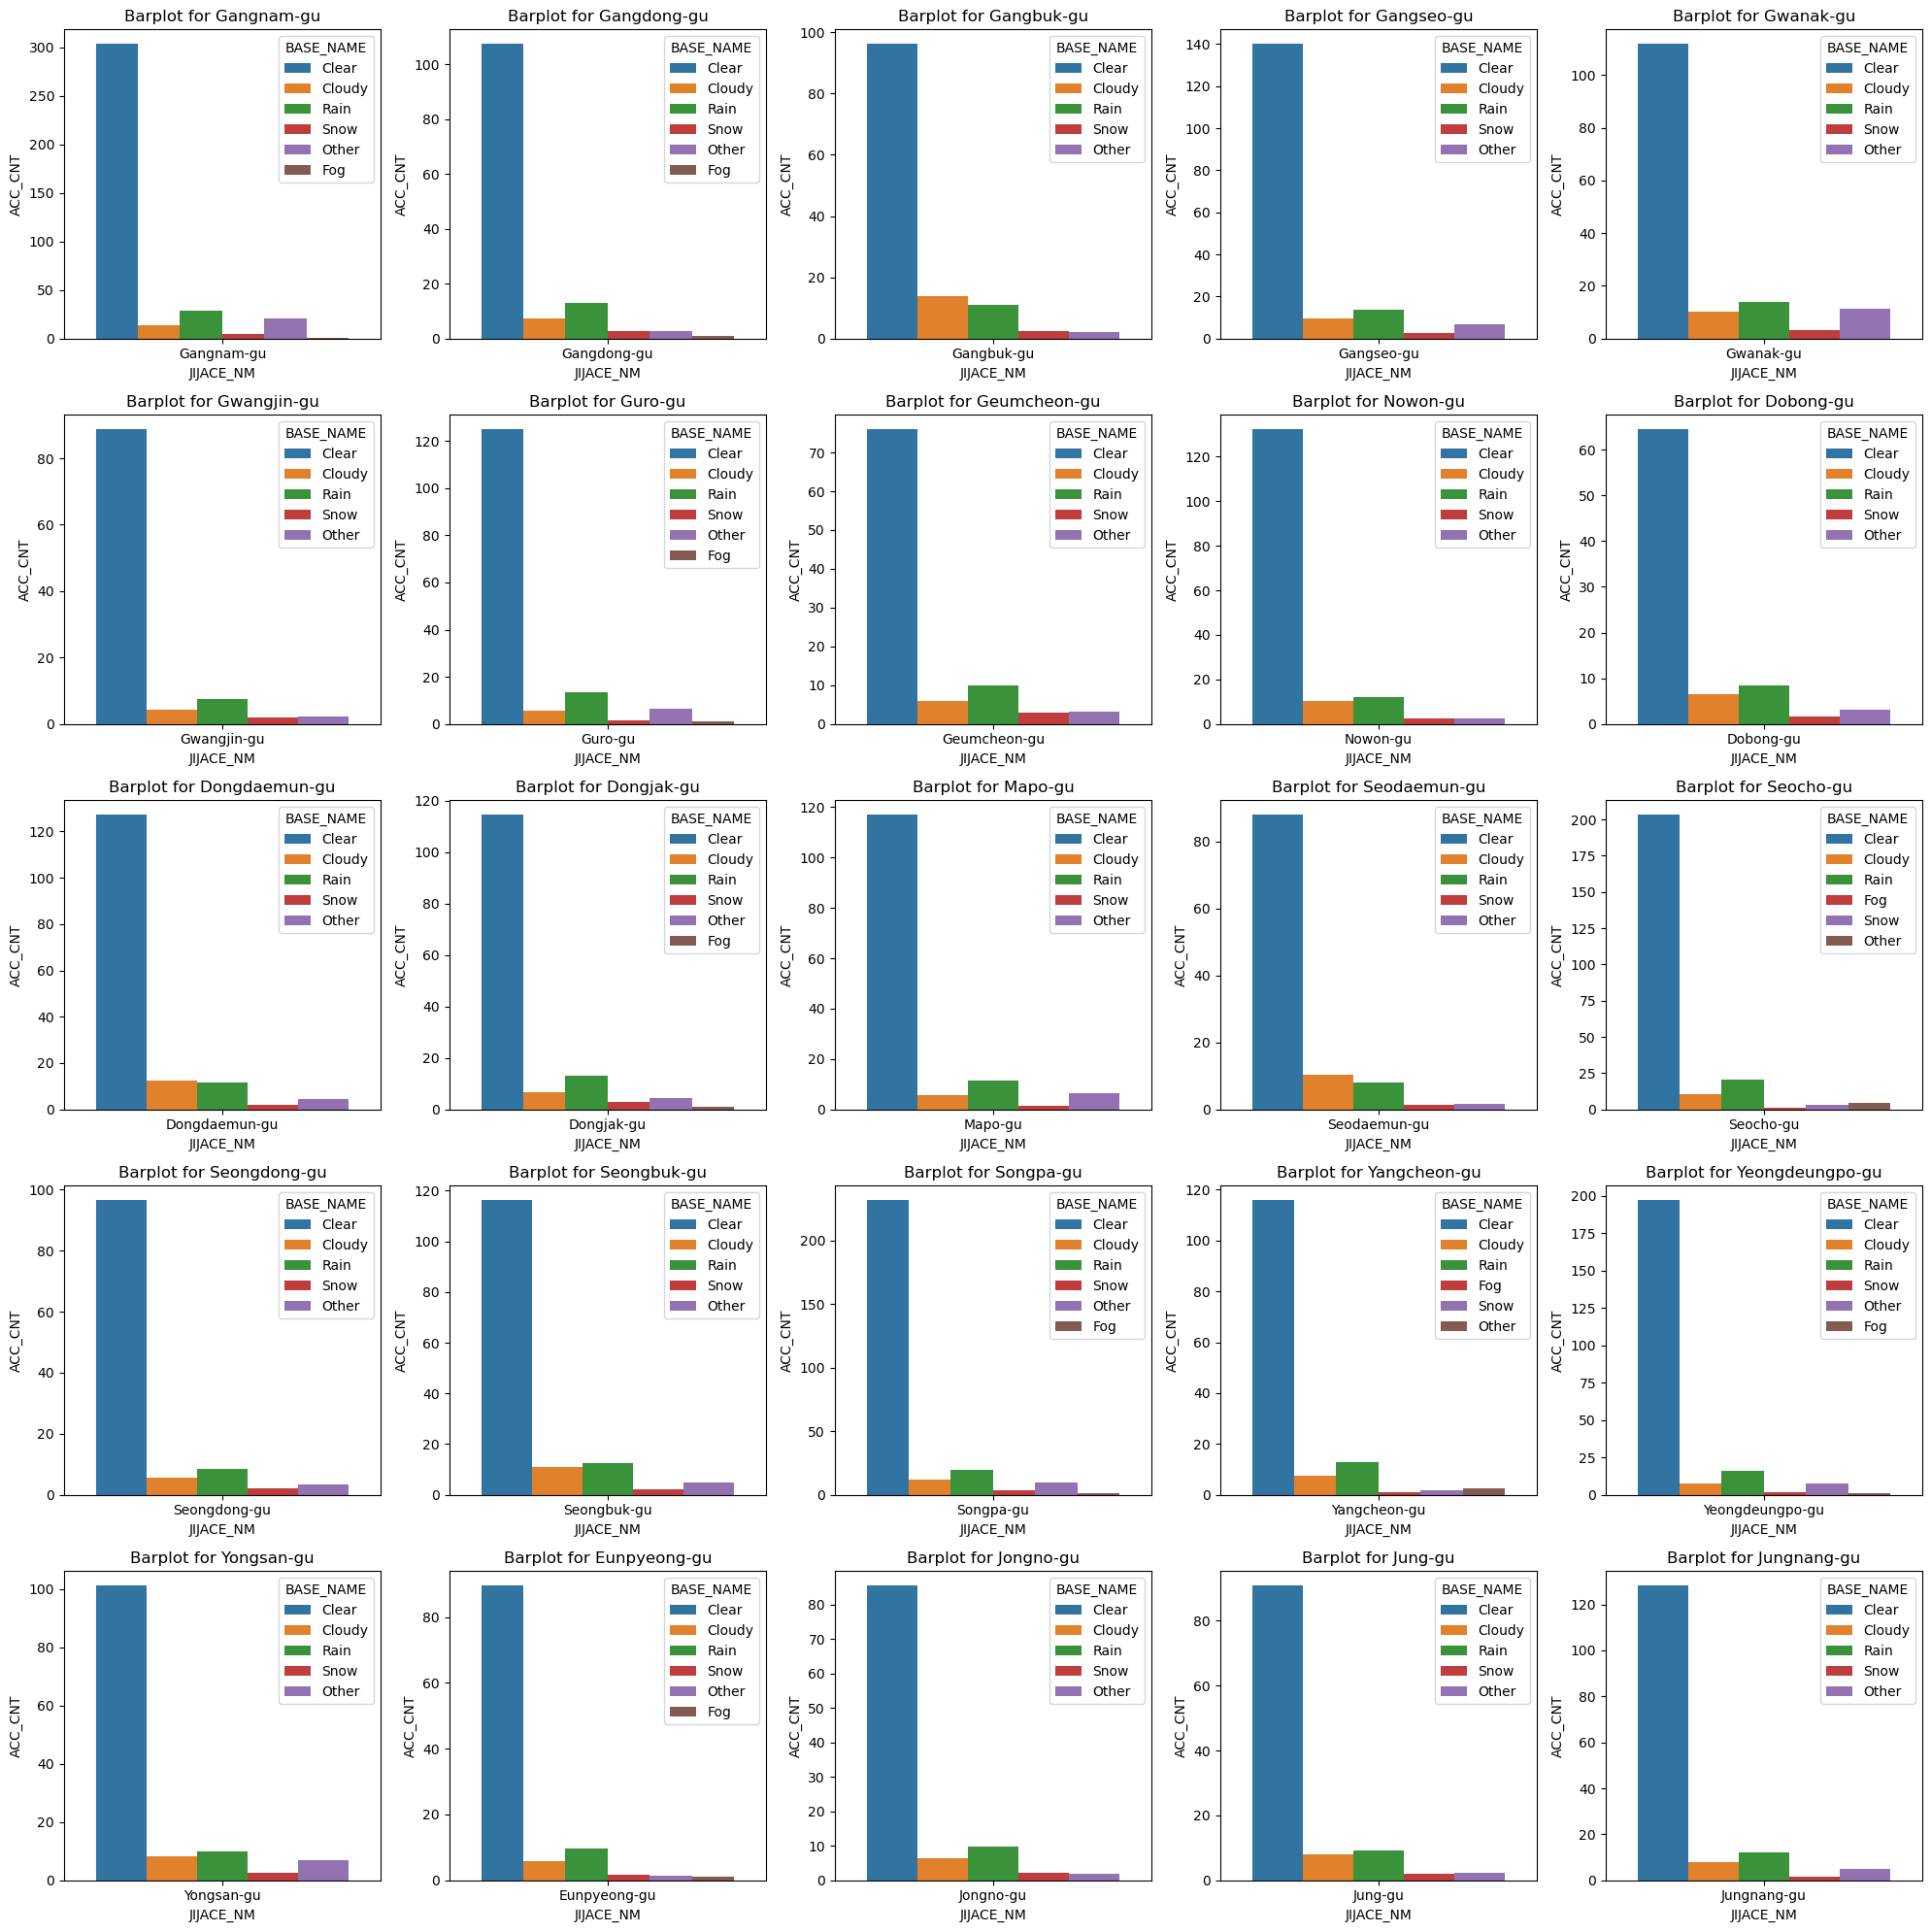

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(20,20))
y_ranges = []
for i, gugun in enumerate(weather_acc_all_df['JIJACE_NM'].unique()):
  row = i // 5
  col = i % 5

  all_df = weather_acc_all_df[weather_acc_all_df['JIJACE_NM'] == gugun]
  sns.barplot(x=all_df['JIJACE_NM'], y=all_df['ACC_CNT'], hue=all_df['BASE_NAME'], data=all_df, errorbar=None, ax=axes[row, col])
  axes[row, col].set_title(f'Barplot for {gugun}')

plt.tight_layout()
plt.show()

In [28]:
cycle_rent_use_df

NameError: name 'cycle_rent_use_df' is not defined

In [ ]:
weather_acc_df['Yr_Mth'] = weather_acc_df['YEAR'].astype(str) + '-' + weather_acc_df['MONTH'].astype(str).str.zfill(2)
weather_acc_df['Yr_Mth'] = pd.to_datetime(weather_acc_df['Yr_Mth'], format='%Y-%m')

In [ ]:
acc_df = weather_acc_df.groupby(['Yr_Mth', 'JIJACE_NM'])['ACC_CNT'].sum().reset_index()

In [ ]:
acc_df

In [ ]:
hire_point_df.columns

In [ ]:
rent_df = pd.merge(hire_point_df, cycle_rent_use_df, how='left', left_on=['Unnamed: 0'], right_on=['Rent_Number'])

In [ ]:
rent_df.isnull().sum()

In [ ]:
rent_df.dropna(inplace=True)

In [ ]:
rent_df = rent_df.groupby(['Rent_Date', 'STA_LOC'])['Rent_Count'].sum().reset_index()

In [ ]:
rent_df

In [ ]:
rent_df['Rent_Date'] = pd.to_datetime(rent_df['Rent_Date'])

In [ ]:
corr_df = pd.merge(rent_df, acc_df, how='outer', left_on=['Rent_Date','STA_LOC'], right_on=['Yr_Mth', 'JIJACE_NM'])

In [ ]:
corr_df = corr_df.fillna(0)

In [ ]:
corr_df

In [ ]:
gugun_corr_df = corr_df.groupby(['STA_LOC'])[['Rent_Count','ACC_CNT']].sum().reset_index()

In [ ]:
gugun_corr_df

In [ ]:
with open('gugun_corr_df.pkl', 'wb') as f:
  pickle.dump(gugun_corr_df, f)

In [ ]:
df = pickle.load(open('gugun_corr_df.pkl', 'rb'))

In [ ]:
df.head(1)

In [ ]:
[df['Rent_Count', 'ACC_CNT']]